In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

# 1. Ideal Allan curve

In [14]:
size = 1000000
a = np.zeros(size)
b = np.zeros(size)
for i in range(size):
    a[i] = (i+1) /1000
    a_square = a[i] * a[i]
    b[i] = np.sqrt(a_square + 1/a[i] + 1/a_square)

In [17]:
log_a = [math.log(i,10) for i in a]
log_b = [math.log(i,10) for i in b]

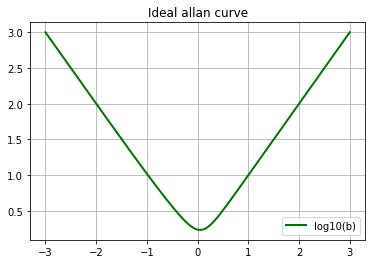

In [22]:
plt.plot(log_a, log_b, linewidth=2, color='#007500', label='log10(b)')

plt.title("Ideal allan curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 1.1 load data

In [11]:
def load_data(file_path, imu_name):
    file_acc_t = file_path + "data_" + imu_name + "_acc_t.txt"
    file_acc_x = file_path + "data_" + imu_name + "_acc_x.txt"
    file_acc_y = file_path + "data_" + imu_name + "_acc_y.txt"
    file_acc_z = file_path + "data_" + imu_name + "_acc_z.txt"
    file_gyr_t = file_path + "data_" + imu_name + "_gyr_t.txt"
    file_gyr_x = file_path + "data_" + imu_name + "_gyr_x.txt"
    file_gyr_y = file_path + "data_" + imu_name + "_gyr_y.txt"
    file_gyr_z = file_path + "data_" + imu_name + "_gyr_z.txt"
    
    file_sim_acc_t = file_path + "data_" + imu_name + "_sim_acc_t.txt"
    file_sim_acc_x = file_path + "data_" + imu_name + "_sim_acc_x.txt"
    file_sim_acc_y = file_path + "data_" + imu_name + "_sim_acc_y.txt"
    file_sim_acc_z = file_path + "data_" + imu_name + "_sim_acc_z.txt"
    file_sim_gyr_t = file_path + "data_" + imu_name + "_sim_gyr_t.txt"
    file_sim_gyr_x = file_path + "data_" + imu_name + "_sim_gyr_x.txt"
    file_sim_gyr_y = file_path + "data_" + imu_name + "_sim_gyr_y.txt"
    file_sim_gyr_z = file_path + "data_" + imu_name + "_sim_gyr_z.txt"
    
    acc_t = np.loadtxt(file_acc_t)
    acc_x = np.loadtxt(file_acc_x)
    acc_y = np.loadtxt(file_acc_y)
    acc_z = np.loadtxt(file_acc_z)
    gyr_t = np.loadtxt(file_gyr_t)
    gyr_x = np.loadtxt(file_gyr_x)
    gyr_y = np.loadtxt(file_gyr_y)
    gyr_z = np.loadtxt(file_gyr_z)

    sim_acc_t = np.loadtxt(file_sim_acc_t)
    sim_acc_x = np.loadtxt(file_sim_acc_x)
    sim_acc_y = np.loadtxt(file_sim_acc_y)
    sim_acc_z = np.loadtxt(file_sim_acc_z)
    sim_gyr_t = np.loadtxt(file_sim_gyr_t)
    sim_gyr_x = np.loadtxt(file_sim_gyr_x)
    sim_gyr_y = np.loadtxt(file_sim_gyr_y)
    sim_gyr_z = np.loadtxt(file_sim_gyr_z)
    
    acc = [acc_x, acc_y, acc_z]
    gyr = [gyr_x, gyr_y, gyr_z]
    sim_acc = [sim_acc_x, sim_acc_y, sim_acc_z]
    sim_gyr = [sim_gyr_x, sim_gyr_y, sim_gyr_z]
    
    all_to_plot = [acc, gyr, sim_acc, sim_gyr]
    all_t = [acc_t, gyr_t, sim_acc_t, sim_gyr_t]
    return all_to_plot, all_t

In [5]:
labels = ["x", "y", "x"]
colors = ['#007500', '#9F35FF','#f75000']
titles = ["Allan curve for IMU acc", "Allan curve for IMU gyr",
         "Allan curve for IMU sim acc","Allan curve for IMU sim gyr"]

def plot_allans(all_to_plot, all_t):
    plt.figure(figsize=(10, 7))
    plt.suptitle(imu_name+' Allan curves',fontsize=16)
    for k in range(4):
        plt.subplot(2,2,k+1)
        log_t = [math.log(i,10) for i in all_t[k]]
        to_plot = all_to_plot[k]
        for i in range(3):
            log_tmp = [math.log(j,10) for j in to_plot[i]]
            plt.plot(log_t, log_tmp, linewidth=2, color=colors[i], label=labels[i])

        plt.title(titles[k])
        plt.legend(loc='upper right')
        plt.grid(True)
    
    plt.show()

# 2 Allan variance

# 2.1 first test with 10 minutes data
#### Simulation parameters:
    double gyro_bias_sigma = 0.00005;
    double acc_bias_sigma = 0.0005;
    double gyro_noise_sigma = 0.015;     // rad/s
    double acc_noise_sigma = 0.019;      //　m/(s^2)

#### imu_utils result:
    Gyr:
    unit: " rad/s"
    avg-axis:
      gyr_n: 2.0767903038966098e-01
      gyr_w: 1.3855957128928881e-03
    x-axis:
      gyr_n: 2.0727126529388271e-01
      gyr_w: 1.0360291874700952e-03
    y-axis:
      gyr_n: 2.0425601046418035e-01
      gyr_w: 1.4840613123205571e-03
    z-axis:
      gyr_n: 2.1150981541091998e-01
      gyr_w: 1.6366966388880124e-03
    Acc:
    unit: " m/s^2"
    avg-axis:
      acc_n: 2.6860189063950379e-01
      acc_w: 2.6695877502107405e-03
    x-axis:
      acc_n: 2.6704976987663631e-01
      acc_w: 2.7460021150246105e-03
    y-axis:
      acc_n: 2.6753201182312319e-01
      acc_w: 2.1195332526258433e-03
    z-axis:
      acc_n: 2.7122389021875187e-01
      acc_w: 3.1432278829817686e-03

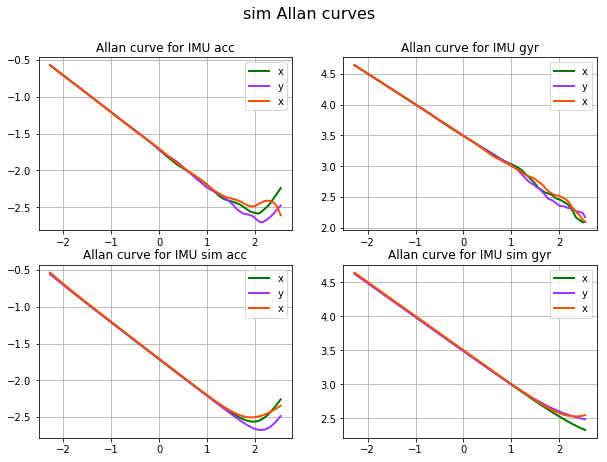

In [19]:
file_path = "/home/viki/UTOPA/ZED/imu/OLD/"
imu_name = "sim"
all_to_plot, all_t = load_data(file_path, imu_name)
plot_allans(all_to_plot, all_t)

Apparently, the upper result allan curves are far from its ideal shape, I need to take data with longer time to calcuate.

# 2.2 Test with 200 minutes data
#### Simulation parameters:
    double gyro_bias_sigma = 0.00005;
    double acc_bias_sigma = 0.0005;
    double gyro_noise_sigma = 0.015;     // rad/s
    double acc_noise_sigma = 0.019;      //　m/(s^2)

#### imu_utils result:
    Gyr:
    unit: " rad/s"
    avg-axis:
      gyr_n: 2.0902986316145364e-01
      gyr_w: 9.1096014385281393e-04
    x-axis:
      gyr_n: 2.0694923908195897e-01
      gyr_w: 9.4503441689580984e-04
    y-axis:
      gyr_n: 2.1093399851219852e-01
      gyr_w: 9.6764347147414631e-04
    z-axis:
      gyr_n: 2.0920635189020348e-01
      gyr_w: 8.2020254318848564e-04
    Acc:
    unit: " m/s^2"
    avg-axis:
      acc_n: 2.6664241730890254e-01
      acc_w: 3.1203949588271291e-03
    x-axis:
      acc_n: 2.6413389165272494e-01
      acc_w: 3.5183760368473166e-03
    y-axis:
      acc_n: 2.6733923186353209e-01
      acc_w: 2.8220353614424628e-03
    z-axis:
      acc_n: 2.6845412841045058e-01
      acc_w: 3.0207734781916074e-03
      
###  Frequence is 200Hz
    the final result of Allan variance should be :
        original_result/(frequence)^0.2
        
    Gyr_noise_sigma = 0.01478
    Gyr_bias_sigma = 0.0000644146
    
    Acc_noise_sigma = 0.0188544
    Acc_bias_sigma = 0.00022064

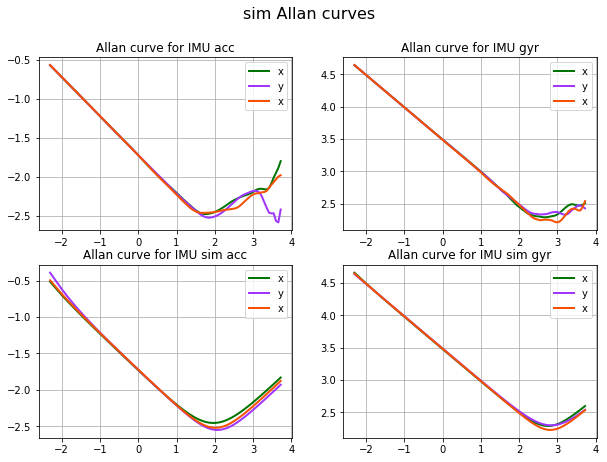

In [12]:
file_path = "/home/viki/UTOPA/ZED/imu/"
imu_name = "sim"
all_to_plot, all_t = load_data(file_path, imu_name)
plot_allans(all_to_plot, all_t)

In [28]:
print("the error ratio of gyr noise sigma is : ",abs(0.01478 - 0.015)/0.015)
print("the error ratio of acc noise sigma is : ",abs(0.0188544 - 0.019)/0.019)
print("the error ratio of gyr bias sigma is : ",abs(0.0000644146 - 0.00005)/0.00005)
print("the error ratio of acc bias sigma is : ",abs(0.00022064 - 0.0005)/0.0005)

the error ratio of gyr noise sigma is :  0.014666666666666647
the error ratio of acc noise sigma is :  0.007663157894736801
the error ratio of gyr bias sigma is :  0.2882919999999999
the error ratio of acc bias sigma is :  0.55872


the noise sigma esimations are very accuracy, however the bias random walk estimations are less good, But there are still acceptable.

# 2.3 Other parameters
#### Simulation parameters:
    double gyro_bias_sigma = 1.0e-5;
    double acc_bias_sigma = 0.0001;
    double gyro_noise_sigma = 0.005;    // rad/s
    double acc_noise_sigma = 0.008;      //　m/(s^2)

#### imu_utils result:
    Gyr:
    unit: " rad/s"
    avg-axis:
      gyr_n: 6.9592326053185286e-02
      gyr_w: 2.9723297362476309e-04
    x-axis:
      gyr_n: 7.0215423009315214e-02
      gyr_w: 2.5724587684481612e-04
    y-axis:
      gyr_n: 7.0202049408646952e-02
      gyr_w: 3.4257927565980805e-04
    z-axis:
      gyr_n: 6.8359505741593732e-02
      gyr_w: 2.9187376836966510e-04
    Acc:
    unit: " m/s^2"
    avg-axis:
      acc_n: 1.1233778501542492e-01
      acc_w: 1.2391259379492491e-03
    x-axis:
      acc_n: 1.1060765569560105e-01
      acc_w: 1.2479313498564473e-03
    y-axis:
      acc_n: 1.1369932288368553e-01
      acc_w: 1.1400213918649506e-03
    z-axis:
      acc_n: 1.1270637646698820e-01
      acc_w: 1.3294250721263491e-03
    
###  Frequence is 200Hz
    the final result of Allan variance should be :
        original_result/(frequence)^0.2
        
    Gyr_noise_sigma = 0.004920922523918624
    Gyr_bias_sigma = 2.101755348202591e-05
    
    Acc_noise_sigma = 0.007943484115576997
    Acc_bias_sigma = 8.761947018937381e-05

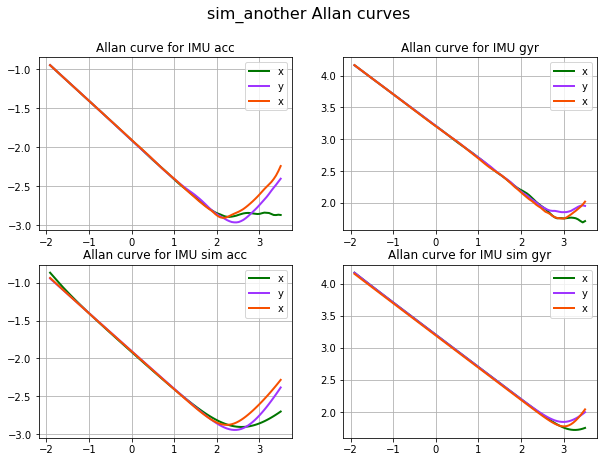

In [13]:
file_path = "/home/viki/UTOPA/ZED/imu/"
imu_name = "sim_another"
all_to_plot, all_t = load_data(file_path, imu_name)
plot_allans(all_to_plot, all_t)

In [29]:
print("the error ratio of gyr noise sigma is : ",abs(0.004920922523918624 - 0.005)/0.005)
print("the error ratio of acc noise sigma is : ",abs(0.00794348 - 0.008)/0.008)
print("the error ratio of gyr bias sigma is : ",abs(2.10175534e-05 - 1.0e-5)/1.0e-5)
print("the error ratio of acc bias sigma is : ",abs(8.7619470e-05 - 0.0001)/0.0001)

the error ratio of gyr noise sigma is :  0.015815495216275205
the error ratio of acc noise sigma is :  0.007065000000000109
the error ratio of gyr bias sigma is :  1.10175534
the error ratio of acc bias sigma is :  0.12380530000000009
